In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime

In [22]:
df = pd.read_csv("tempHumid-2020-03-21.log",
                    names=['Datetime', 'etc'],
                    header=None, index_col='Datetime')
df

,etc
Datetime,
2020-03-21 10:21:58,573 INFO 1870 Temp=20.0C Humidity=39.0%
2020-03-21 10:22:10,642 INFO 1870 Temp=20.0C Humidity=41.0%
2020-03-21 10:22:22,711 INFO 1870 Temp=20.0C Humidity=42.0%
2020-03-21 10:23:10,573 INFO 1870 Temp=21.0C Humidity=39.0%
2020-03-21 10:23:48,642 INFO 1870 Temp=21.0C Humidity=41.0%
2020-03-21 10:24:22,711 INFO 1870 Temp=22.0C Humidity=42.0%
2020-03-21 10:24:58,573 INFO 1870 Temp=20.0C Humidity=40.0%
2020-03-21 10:25:10,642 INFO 1870 Temp=18.0C Humidity=41.0%
2020-03-21 10:25:22,711 INFO 1870 Temp=19.0C Humidity=42.0%


In [23]:
df[['etc1', 'etc2', 'etc3', 'Temp', 'Humid']] = df['etc'].str.split(' ', n=5, expand=True)
df

,etc,etc1,etc2,etc3,Temp,Humid
Datetime,,,,,,
2020-03-21 10:21:58,573 INFO 1870 Temp=20.0C Humidity=39.0%,573,INFO,1870,Temp=20.0C,Humidity=39.0%
2020-03-21 10:22:10,642 INFO 1870 Temp=20.0C Humidity=41.0%,642,INFO,1870,Temp=20.0C,Humidity=41.0%
2020-03-21 10:22:22,711 INFO 1870 Temp=20.0C Humidity=42.0%,711,INFO,1870,Temp=20.0C,Humidity=42.0%
2020-03-21 10:23:10,573 INFO 1870 Temp=21.0C Humidity=39.0%,573,INFO,1870,Temp=21.0C,Humidity=39.0%
2020-03-21 10:23:48,642 INFO 1870 Temp=21.0C Humidity=41.0%,642,INFO,1870,Temp=21.0C,Humidity=41.0%
2020-03-21 10:24:22,711 INFO 1870 Temp=22.0C Humidity=42.0%,711,INFO,1870,Temp=22.0C,Humidity=42.0%
2020-03-21 10:24:58,573 INFO 1870 Temp=20.0C Humidity=40.0%,573,INFO,1870,Temp=20.0C,Humidity=40.0%
2020-03-21 10:25:10,642 INFO 1870 Temp=18.0C Humidity=41.0%,642,INFO,1870,Temp=18.0C,Humidity=41.0%
2020-03-21 10:25:22,711 INFO 1870 Temp=19.0C Humidity=42.0%,711,INFO,1870,Temp=19.0C,Humidity=42.0%


In [24]:
del df['etc']

In [25]:
del df['etc1']

In [26]:
del df['etc2']

In [27]:
del df['etc3']

In [28]:
df['Temp'] = df['Temp'].str.slice(start=5, stop=-1)

In [29]:
df['Temp'] = df['Temp'].apply(pd.to_numeric)

In [30]:
df['Humid'] = df['Humid'].str.slice(start=9, stop=-1)

In [31]:
df['Humid'] = df['Humid'].apply(pd.to_numeric)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 2020-03-21 10:21:58 to 2020-03-21 10:30:22
Data columns (total 2 columns):
Temp     18 non-null float64
Humid    18 non-null float64
dtypes: float64(2)
memory usage: 432.0+ bytes


In [33]:
df.index = pd.to_datetime(df.index)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2020-03-21 10:21:58 to 2020-03-21 10:30:22
Data columns (total 2 columns):
Temp     18 non-null float64
Humid    18 non-null float64
dtypes: float64(2)
memory usage: 432.0 bytes


In [35]:
df

,Temp,Humid
Datetime,,
2020-03-21 10:21:58,20.0,39.0
2020-03-21 10:22:10,20.0,41.0
2020-03-21 10:22:22,20.0,42.0
2020-03-21 10:23:10,21.0,39.0
2020-03-21 10:23:48,21.0,41.0
2020-03-21 10:24:22,22.0,42.0
2020-03-21 10:24:58,20.0,40.0
2020-03-21 10:25:10,18.0,41.0
2020-03-21 10:25:22,19.0,42.0


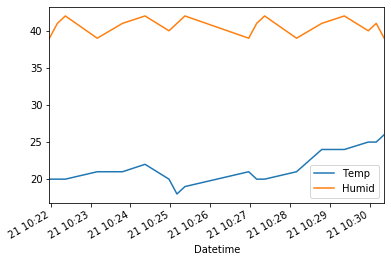

In [36]:
df.plot()

Datetime
2020-03-21 10:21:00    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-21 10:22:00    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-21 10:23:00    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-21 10:24:00    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-21 10:25:00    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-21 10:26:00    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-21 10:27:00    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-21 10:28:00    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-21 10:29:00    AxesSubplot(0.125,0.125;0.775x0.755)
2020-03-21 10:30:00    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

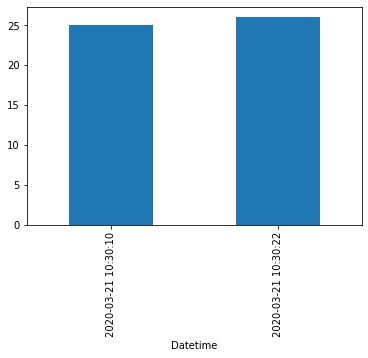

In [37]:
df['Temp'].resample('min').plot(kind='bar')

In [38]:
df_cond_min = df[df['Temp'] == df['Temp'].min()]
df_min = df_cond_min.loc[:, ['Temp']]
min_idx = mpl.dates.date2num(df_min.index.to_pydatetime())
arrowprops = dict(facecolor='black', headwidth=4, width=2, headlength=4)
plt.annotate('Lowest', xy=(min_idx, df['Temp'].min()), arrowprops=arrowprops,horizontalalignment='right',verticalalignment='top')

Text([737505.43414352], 18.0, 'Lowest')

ValueError: Image size of 246916856x3945 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>